<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">


<h1><center>Customer Churn Prediction</center></h1>

<img src = "https://user-images.githubusercontent.com/53637541/87217571-50edd380-c368-11ea-9ee1-05035129b313.jpg">

## Introduction

### What is customer churn ?

Customer churn, also known as customer turnover, or defection, is one of the biggest enemies of any company. In a nutshell, customer churn is the number or percentage of customers that stop paying for your subscription, product, or service during a certain period of time.

<img src = "https://user-images.githubusercontent.com/53637541/87217575-52b79700-c368-11ea-950d-9f9a7b7c5af8.png">

Customer churn is a major problem and one of the most important concerns for large companies. Due to the direct effect on the revenues of the companies, especially in the telecom field, companies are seeking to develop means to predict potential customer to churn. Therefore, finding factors that increase customer churn is important to take necessary actions to reduce this churn.

## Defining Problem Statement

In the competitive Telecom industry, public policies and standardization of mobile
communication allow customers to easily switch over from one carrier to another, resulting
in a strained fluidic market. Churn prediction, or the task of identifying customers who are
likely to discontinue use of a service, is an important and lucrative concern of the Telecom
industry.The main objective of this project is to develop a churn prediction model which assists telecom operators to predict customers who are most likely subject to churn.

<img src = "https://user-images.githubusercontent.com/53637541/87217572-51866a00-c368-11ea-90b5-dd2e28fd00de.jpg">

## Choosing the Right Tools

In [25]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 60
pd.options.display.max_rows = 30
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
import itertools
import warnings
warnings.filterwarnings("ignore")

## Importing the Dataset

In [26]:
#Loading the dataset
data = pd.read_csv(r"F:\EDA Projects\Customer Churn Prediction\dataset.csv")
data.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


| Column Name        | Description                                               |
| -------------      |:-------------                                            :| 
| CustomerID         | Passenger Identity                                        | 
| Gender             | Whether the customer is a male or a female                         |  
| SeniorCitizen      | Whether the customer is a senior citizen or not (1, 0)                                           | 
| Partner            | Whether the customer has a partner or not (Yes, No)                                         |   
| Dependents         | Whether the customer has dependents or not (Yes, No)                                          |
| Tenure             | Number of months the customer has stayed with the company                                          |
| PhoneService       | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines      | Whether the customer has multiple lines or not (Yes, No, No phone service)|
| InternetService    | Customer’s internet service provider (DSL, Fiber optic, No)                                             |
| OnlineSecurity     | Whether the customer has online security or not (Yes, No, No internet service)                                           |
| OnlineBackup       | Whether the customer has online backup or not (Yes, No, No internet service)                                              |
| DeviceProtection   | Whether the customer has device protection or not (Yes, No, No internet service)                                       |
| TechSupport        | Whether the customer has tech support or not (Yes, No, No internet service)                                       |
| StreamingTV        | Whether the customer has streaming TV or not (Yes, No, No internet service)                                       |
| StreamingMovies    | Whether the customer has streaming movies or not (Yes, No, No internet service)                                       |
| Contract           | The contract term of the customer (Month-to-month, One year, Two year)                                       |
| PaperlessBilling   | Whether the customer has paperless billing or not (Yes, No)                                       |
| PaymentMethod      | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))                                       |
| MonthlyCharges     | The amount charged to the customer monthly                                       |
| TotalCharges       | The total amount charged to the customer                                       |
| Churn              | Whether the customer churned or not (Yes or No)                                       |


## Data Profiling

In [27]:
#import pandas_profiling
#profile = pandas_profiling.ProfileReport(data)
#profile.to_file("Customer Churn Profiling.html")

## Data Processing

In [28]:
#Checking the basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


__Observations__

- The dataset contains __7043 records__ and __21 columns__.
- There are missing values in __TotalCharges__ Column.
- There are __4 columns__ with __Numeric__ Datatype and __17 columns__ with __Non-Numeric__ Datatype.

In [29]:
data.isnull().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

__Observation__

- There are only __11 mising values__ in TotalCharges column.

In [30]:
#checking for unique values
print(data.nunique())

CustomerID          7043
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
Tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


In [31]:
#Checking the basic Statistical summary of the dataset
data.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


__Observation__

- __Tenure__ cannot have 0 value since it denotes Number of months the customer has stayed with the company.

In [32]:
#Let's look at data where tenure is zero
data[data["Tenure"] == 0]

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


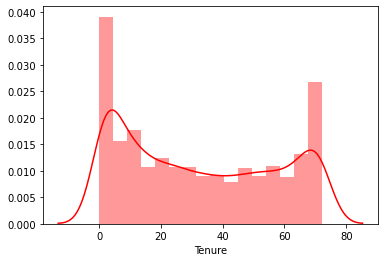

In [33]:
sns.distplot(data.Tenure, color = "red")

In [34]:
#Lets replace tenure having 0 values with the mean since there are no extreme values
data["Tenure"] = data["Tenure"].replace(0,data["Tenure"].mean())

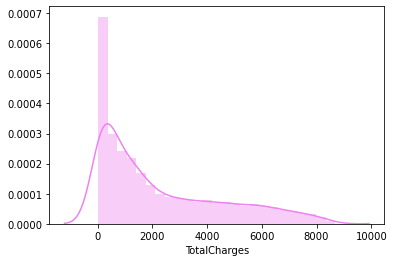

In [35]:
sns.distplot(data.TotalCharges, color = "violet")

In [36]:
#Lets replace missing values in TotalCharges column using Median since there are extreme values the data is right skewed
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].median())

In [37]:
#Replacing the SeniorCitizen columns (1 --> Yes ; 0 --> No)
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})

## Exploratory Data Analysis

In [38]:
data.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### How is the dataset balanced?

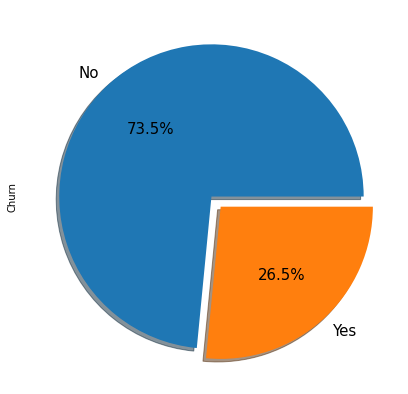

In [39]:
#Checking the dataset whether it is balanced or Imbalanced
fig = plt.figure(figsize = (15,7))
data["Churn"].value_counts().plot(kind = "pie", explode = [0, 0.09], autopct = "%3.1f%%", shadow = True, fontsize = 15)

__Observation__

- From the above __Pie chart__, we can infer that the dataset is a __balanced dataset__.
- Customers who stayed with the company are __73.5%__(subscribed) and who left the company are __26.5%__(unsubscribed).

### What is the gender distribution?

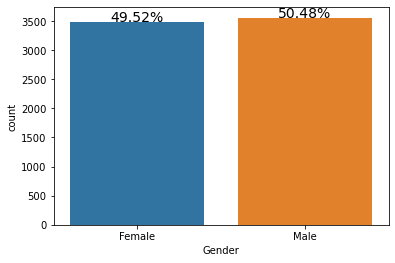

In [40]:
s = sns.countplot(x = 'Gender',data = data)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data)*100),
            ha="center", fontsize=14) 

__Observation__

- About half of the customers in our dataset are male while the other half are female.

### Which group of customers (younger or elder) does the dataset constitute the most?

Text(0.5, 1.0, '% of Senior Citizens')

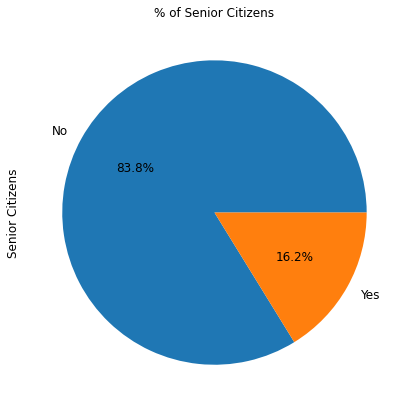

In [41]:
fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot()
ax = (data['SeniorCitizen'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'], fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

__Observation__

- There are only __16%__ of the customers who are __senior citizens__. Thus most of our customers in the data are younger people.

### How many customers are there with Partners and Dependents?

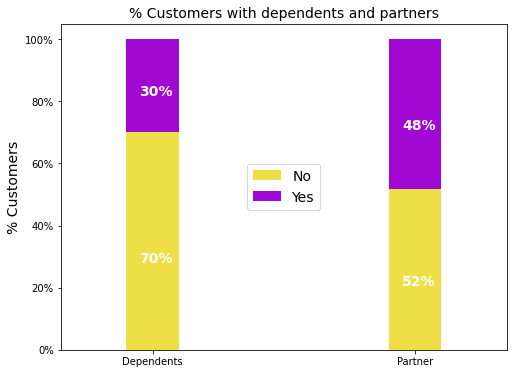

In [42]:
temp1 = pd.melt(data, id_vars = ['CustomerID'], value_vars=['Dependents','Partner'])
temp2 = temp1.groupby(['variable','value']).count().unstack()
temp2 = temp2*100/len(data)
colors = ['#eddf45','#a108d4']
ax = temp2.loc[:,'CustomerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

__Observation__

- About __48% of the customers__ have a partner, while only __30% of the total customers__ have dependents. 

### What are the tenure of customers based on their contract type?

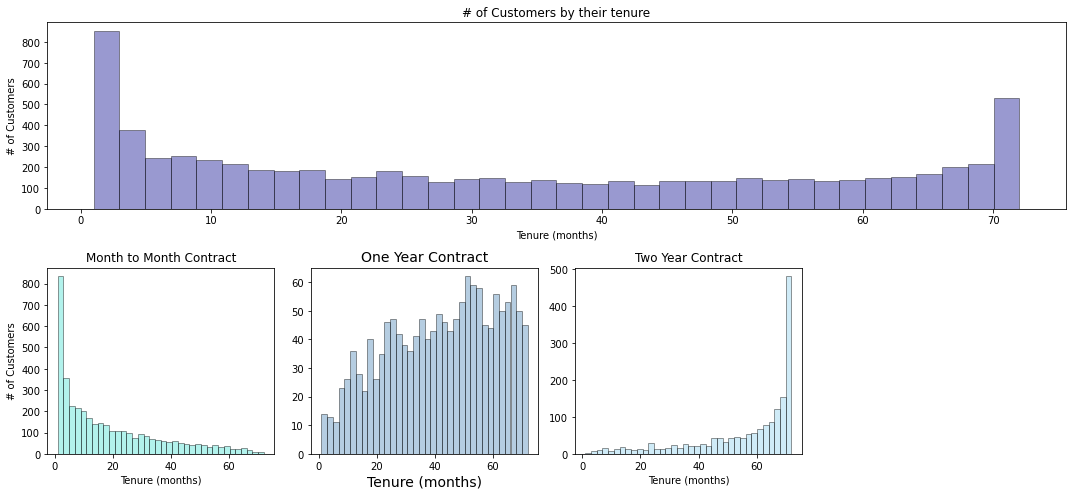

In [43]:
fig = plt.figure(figsize = (15,7))
gs = fig.add_gridspec(2,4)

ax1 = fig.add_subplot(gs[0, :])
ax1 = sns.distplot(data['Tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             ax = ax1)



ax1.set_ylabel('# of Customers')
ax1.set_xlabel('Tenure (months)')
ax1.set_title('# of Customers by their tenure')

ax2 = fig.add_subplot(gs[1, 0])
ax2 = sns.distplot(data[data['Contract']=='Month-to-month']['Tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax2)
ax2.set_ylabel('# of Customers')
ax2.set_xlabel('Tenure (months)')
ax2.set_title('Month to Month Contract')

ax3 = fig.add_subplot(gs[1, 1])
ax3 = sns.distplot(data[data['Contract']=='One year']['Tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax3)
ax3.set_xlabel('Tenure (months)',size = 14)
ax3.set_title('One Year Contract',size = 14)

ax4 = fig.add_subplot(gs[1, 2])
ax4 = sns.distplot(data[data['Contract']=='Two year']['Tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'skyblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax4)

ax4.set_xlabel('Tenure (months)')
ax4.set_title('Two Year Contract')
plt.tight_layout()

__Observation__

-  From the above chart, we can infer that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

### What is the distribution of the services offered?

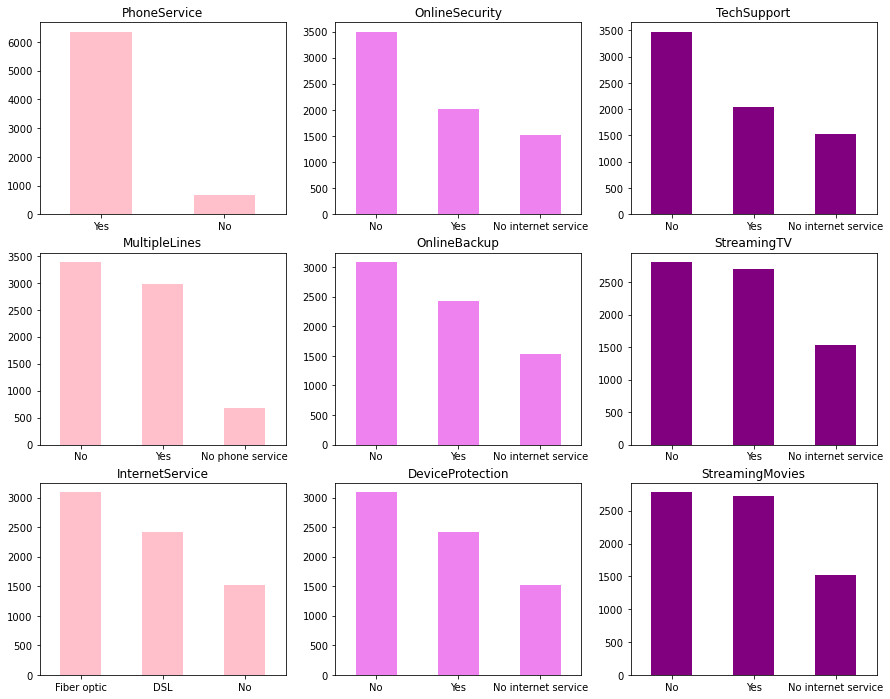

In [44]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color = "pink")
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0, color = "violet")
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0, color = "purple")
    ax.set_title(item)

__Observations__

- There are more subscriptions to __Phone service__ compared to other services offered.
- Customers who use __Streaming TV & Movies__ are almost same.
- __Fiber Optic__ is the most used medium in Internet Service.

### What is the relationship between Monthly and Total Charges with Churn?

Text(0.5, 1.0, 'Monthly Charges vs Total Charges')

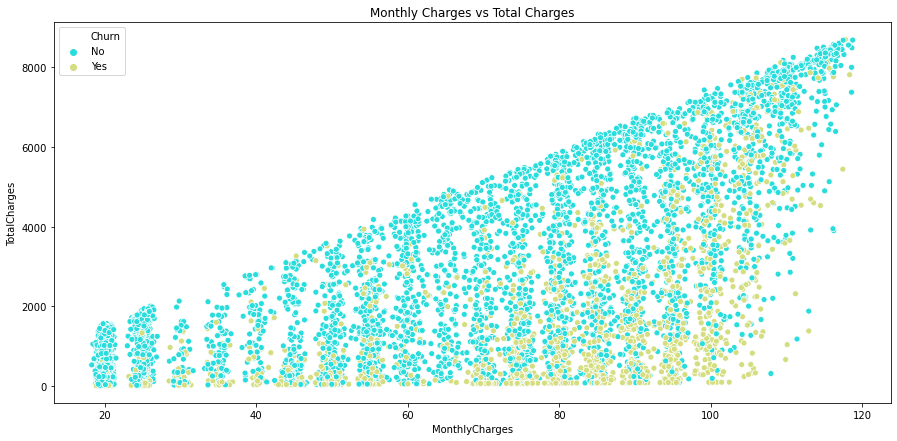

In [45]:
fig = plt.figure(figsize = (15,7))
sns.scatterplot(x = data.MonthlyCharges, y = data.TotalCharges, data = data, hue = data.Churn, palette = "rainbow")
plt.title("Monthly Charges vs Total Charges")

__Observation__

- Total charges increases as the monthly bill for a customer increases.
- Customer attrition is more as the monthly charges increases.

### What is the distribution of the Churn rate?

Text(0.5, 1.0, 'Churn Rate')

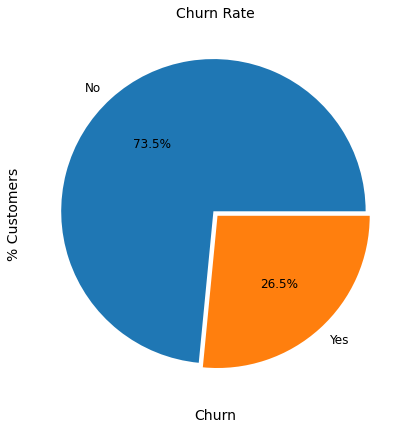

In [46]:
fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot()
ax = (data['Churn'].value_counts()*100.0 /len(data))\
.plot(kind = "pie", explode = [0.02,0.02], autopct='%3.1f%%', labels = ['No', 'Yes'], fontsize = 12)                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

__Observation__

- From the above pie chart, it's clear that majority(__73%__) of the customers do not churn. 

### What is the Correlation between parameters?

In [47]:
cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']

In [50]:
from sklearn.preprocessing import LabelEncoder
lael_encoded_data = data.copy()
#Label Encooding
le = LabelEncoder()
for i in cols:
    lael_encoded_data[i] = le.fit_transform(lael_encoded_data[i])

In [51]:
corr = lael_encoded_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Gender,1.00,-0.00,-0.00,0.01,0.01,-0.01,-0.01,-0.00,-0.02,-0.01,0.00,-0.01,-0.01,-0.01,0.00,-0.01,0.02,-0.01,-0.00,-0.01
SeniorCitizen,-0.00,1.00,0.02,-0.21,0.02,0.01,0.15,-0.03,-0.13,-0.01,-0.02,-0.15,0.03,0.05,-0.14,0.16,-0.04,0.22,0.10,0.15
Partner,-0.00,0.02,1.00,0.45,0.38,0.02,0.14,0.00,0.15,0.15,0.17,0.13,0.14,0.13,0.29,-0.01,-0.15,0.10,0.32,-0.15
Dependents,0.01,-0.21,0.45,1.00,0.16,-0.00,-0.02,0.04,0.15,0.09,0.08,0.13,0.05,0.02,0.24,-0.11,-0.04,-0.11,0.06,-0.16
Tenure,0.01,0.02,0.38,0.16,1.00,0.01,0.34,-0.03,0.33,0.37,0.37,0.32,0.29,0.30,0.68,0.00,-0.37,0.25,0.83,-0.35
PhoneService,-0.01,0.01,0.02,-0.00,0.01,1.00,-0.02,0.39,-0.02,0.02,0.00,-0.02,0.06,0.04,0.00,0.02,-0.00,0.25,0.11,0.01
MultipleLines,-0.01,0.15,0.14,-0.02,0.34,-0.02,1.00,-0.11,0.01,0.12,0.12,0.01,0.18,0.18,0.11,0.17,-0.18,0.43,0.45,0.04
InternetService,-0.00,-0.03,0.00,0.04,-0.03,0.39,-0.11,1.00,-0.03,0.04,0.04,-0.03,0.11,0.10,0.10,-0.14,0.09,-0.32,-0.18,-0.05
OnlineSecurity,-0.02,-0.13,0.15,0.15,0.33,-0.02,0.01,-0.03,1.00,0.19,0.18,0.29,0.04,0.06,0.37,-0.16,-0.10,-0.05,0.25,-0.29
OnlineBackup,-0.01,-0.01,0.15,0.09,0.37,0.02,0.12,0.04,0.19,1.00,0.19,0.20,0.15,0.14,0.28,-0.01,-0.12,0.12,0.38,-0.20


__Observations__

- __Tenure__ is more positively correlated with __Total Charges and Contract__.
- __Churn rate and Contract__ has strong negative correlation.

### What is the Correlation between Churn and other features?

In [52]:
#One Hot Encoding
df = data.iloc[:,1:]
df["Churn"].replace(to_replace = "Yes" , value = 1 , inplace = True)
df["Churn"].replace(to_replace = "No", value = 0, inplace = True)
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34.0,56.95,1889.50,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2.0,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45.0,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2.0,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


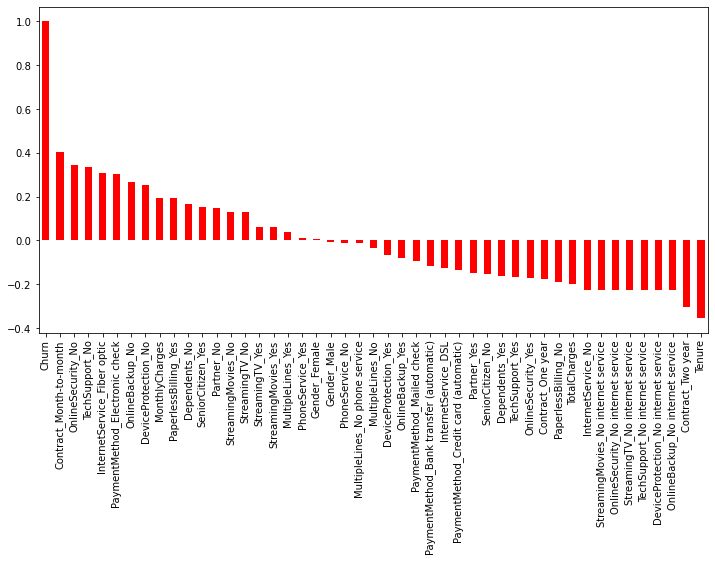

In [53]:
fig = plt.figure(figsize = (12,6))
df_dummies.corr()["Churn"].sort_values(ascending = False).plot(kind = "bar", color = "red")

__Observation__

- Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn

## Feature Engineering

In [54]:
#Let's create a new column Tenure group
def tenure_period(data) :
    
    if data["Tenure"] <= 12 :
        return "0-1 Year"
    elif (data["Tenure"] > 12) & (data["Tenure"] <= 24 ):
        return "1-2 Years"
    elif (data["Tenure"] > 24) & (data["Tenure"] <= 36) :
        return "2-3 Years"
    elif (data["Tenure"] > 36) & (data["Tenure"] <= 48) :
        return "3-4 Years"
    elif (data["Tenure"] > 48) & (data["Tenure"] <= 60) :
        return "4-5 Years"
    elif data["Tenure"] > 60 :
        return "Above 5 Years"
data["Tenure_Group"] = data.apply(lambda data:tenure_period(data), axis = 1)

In [55]:
#Creating a new column with all services included
data['Internet']= np.where(data.InternetService != 'No', 'Yes', 'No')

data['Total_Services'] = (data[['PhoneService', 'OnlineSecurity',
                                      'OnlineBackup', 'DeviceProtection', 
                                      'TechSupport', 'StreamingTV', 
                                      'StreamingMovies', 'Internet']] == 'Yes').sum(axis=1)

In [56]:
data.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure_Group', 'Internet', 'Total_Services'],
      dtype='object')

In [57]:
cat_cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Tenure_Group', 'Internet']

In [58]:
#Separating catagorical and numerical columns
Id_col     = ['CustomerID']
target_col = ["Churn"]
#cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in data.columns if x not in cat_cols + target_col + Id_col]

In [59]:

#Separating churn and non churn customers
churn     = data[data["Churn"] == "Yes"]
not_churn = data[data["Churn"] == "No"]

#function for pie plot for customer attrition types
def plot_pie(column) :
    
    churn_cus = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,color = "rgb(243,243,243)")),
                    hole = 0.6)
                                               
                               
    nonchurn_cus = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [.52,1]),
                    name    = "Non Churn Customers",
                    marker  = dict(line = dict(width = 2, color = "rgb(243,243,243)")),
                    hole    = 0.6)
                    
                   


    layout = go.Layout(dict(title = column + " distribution in Customer Attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Churn Customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non Churn Customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [churn_cus,nonchurn_cus]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

In [60]:
#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

Churn rate based on total no. of services offered with respect to contract


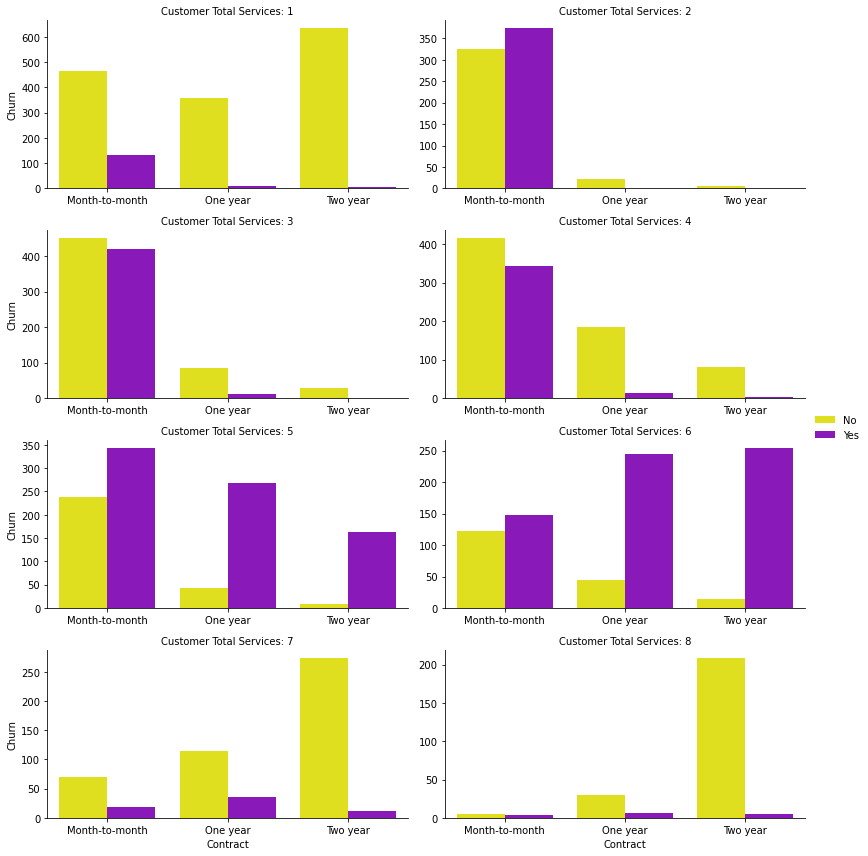

In [61]:
#To understand the churn distribution for the number of services.
def countplot(x, hue, **kwargs):
    sns.countplot(x=x, hue=hue, **kwargs, order=['Month-to-month', 'One year', 'Two year'])
print("Churn rate based on total no. of services offered with respect to contract")
grid = sns.FacetGrid(data=data,col='Total_Services', col_wrap=2,
                     aspect=1.9, height=3, sharey=False, sharex=False)
fig = grid.map(countplot,'Contract','Churn', palette=['yellow', 'darkviolet'] )
fig.set_titles('Customer Total Services: {col_name}', fontsize=18)
fig.add_legend()
plt.show()

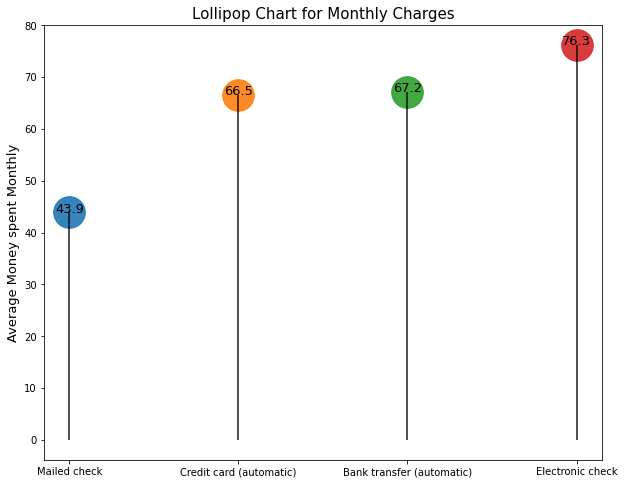

In [62]:
# prepare the data for plotting
df = data.groupby(["PaymentMethod"])["MonthlyCharges", "TotalCharges"].mean()
df.sort_values("MonthlyCharges", inplace = True)

# fitler x and y
x = df.index
y = df["MonthlyCharges"]

# instantiate the figure
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot()

# plot the data
for x_, y_ in zip(x, y):
    # make a scatter plot
    ax.scatter(x_, y_,  alpha = 0.9, s = 1000)
    
    # add vertical lines to connect them to the data point (head of the lollipop)
    ax.vlines(x_, ymin = 0, ymax = y_,  alpha = 0.9)
    
    # add text with the data
    ax.text(x_, y_ , round(y_, 1), horizontalalignment='center', fontsize = 13)
    


ax.set_ylabel("Average Money spent Monthly", fontsize = 13)
ax.set_title("Lollipop Chart for Monthly Charges", fontsize = 15);

__Observation__

- __Electronic check__ Payment method has the highest average amount spent monthly __($76.3)__. 

In [63]:
#scatter plot monthly charges & total charges by tenure group

def plot_tenure_scatter(tenure_group,color) :
    tracer = go.Scatter(x = data[data["Tenure_Group"] == tenure_group]["MonthlyCharges"],
                        y = data[data["Tenure_Group"] == tenure_group]["TotalCharges"],
                        mode = "markers",marker = dict(line = dict(color = "black",
                                                                   width = .2),
                                                       size = 4 , color = color,
                                                       symbol = "diamond-dot",
                                                      ),
                        name = tenure_group,
                        opacity = .9
                       )
    return tracer

#scatter plot monthly charges & total charges by churn group

def plot_churncharges_scatter(churn,color) :
    tracer = go.Scatter(x = data[data["Churn"] == churn]["MonthlyCharges"],
                        y = data[data["Churn"] == churn]["TotalCharges"],
                        mode = "markers",marker = dict(line = dict(color = "black",
                                                                   width = .2),
                                                       size = 4 , color = color,
                                                       symbol = "diamond-dot",
                                                      ),
                        name = "Churn - " + churn,
                        opacity = .9
                       )
    return tracer

trace1 = plot_tenure_scatter("0-1 Year","#ff0800")
trace2 = plot_tenure_scatter("1-2 Years","#26ff00")
trace3 = plot_tenure_scatter("2-3 Years","#0066ff")
trace4 = plot_tenure_scatter("3-4 Years","#ff6f00")
trace5 = plot_tenure_scatter("4-5 Years","#ff00aa")
trace6 = plot_tenure_scatter("Above 5 Years","#00f2ff")
trace7 = plot_churncharges_scatter("Yes","red")
trace8 = plot_churncharges_scatter("No","blue")

data1   = [trace1,trace2,trace3,trace4,trace5,trace6] 
data2   = [trace7,trace8]

#layout
def layout_title(title) :
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "Monthly charges",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "Total Charges",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            height = 600
                           )
                      )
    return layout

layout1  = layout_title("Monthly Charges & Total Charges by Tenure group")
layout2  = layout_title("Monthly Charges & Total Charges by Churn group")
fig1 = go.Figure(data = data1,layout = layout1)
fig2 = go.Figure(data = data2,layout = layout2)
py.iplot(fig1)
py.iplot(fig2)

## Splitting the dataset into training and testing

In [64]:
#One Hot Encoding
df1 = data.iloc[:,1:]
df1["Churn"].replace(to_replace = "Yes" , value = 1 , inplace = True)
df1["Churn"].replace(to_replace = "No", value = 0, inplace = True)
df_dummies = pd.get_dummies(df1)
df_dummies.head()

,Tenure,MonthlyCharges,TotalCharges,Churn,Total_Services,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_0-1 Year,Tenure_Group_1-2 Years,Tenure_Group_2-3 Years,Tenure_Group_3-4 Years,Tenure_Group_4-5 Years,Tenure_Group_Above 5 Years,Internet_No,Internet_Yes
0,1.0,29.85,29.85,0,2,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
1,34.0,56.95,1889.50,0,4,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
2,2.0,53.85,108.15,1,4,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
3,45.0,42.30,1840.75,0,4,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1
4,2.0,70.70,151.65,1,2,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1


In [65]:
# We will use the data frame where we had created dummy variables
X = df_dummies.drop(columns = ['Churn'])
y = df_dummies['Churn'].values

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [66]:
X.head()

,Tenure,MonthlyCharges,TotalCharges,Total_Services,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_0-1 Year,Tenure_Group_1-2 Years,Tenure_Group_2-3 Years,Tenure_Group_3-4 Years,Tenure_Group_4-5 Years,Tenure_Group_Above 5 Years,Internet_No,Internet_Yes
0,0.000000,0.115423,0.001275,0.142857,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.464789,0.385075,0.215867,0.428571,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.014085,0.354229,0.010310,0.428571,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.619718,0.239303,0.210241,0.428571,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.014085,0.521891,0.015330,0.142857,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
from sklearn.model_selection import train_test_split
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [70]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (5634, 55)
y_train shape:  (5634,)

Test cases as below
X_test shape:  (1409, 55)
y_test shape:  (1409,)


## Training & Predicting the Models

### Logistic Regression

In [71]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [72]:
#Predicting the model

y_pred_train_lr = log_model.predict(X_train)
y_pred_test_lr = log_model.predict(X_test)

In [73]:
#Model Evaluation using Accuracy Score

from sklearn.metrics import accuracy_score
accuracy_train_lr = accuracy_score(y_train,y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test,y_pred_test_lr)
print('Accuracy score for train data is:', accuracy_train_lr)
print('Accuracy score for test data is:', accuracy_test_lr)

Accuracy score for train data is: 0.8067092651757188
Accuracy score for test data is: 0.815471965933286


AxesSubplot(0.125,0.125;0.775x0.755)


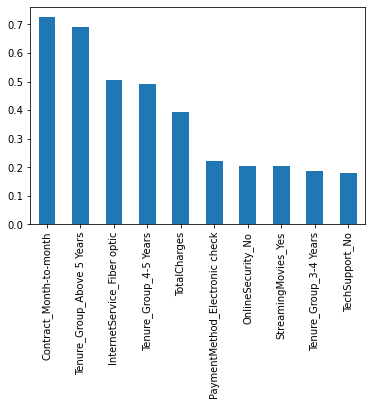

In [74]:
#Getting the weights to find most important features

more_weights = pd.Series(log_model.coef_[0],
                 index=X.columns.values)
print (more_weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [75]:
#Features that are least important
less_weights = pd.DataFrame(more_weights.sort_values(ascending = False)[-10:])
less_weights

,0
StreamingMovies_No,-0.125846
OnlineSecurity_Yes,-0.127909
PaperlessBilling_No,-0.174583
MultipleLines_No,-0.193944
Tenure_Group_0-1 Year,-0.371843
InternetService_DSL,-0.426980
Tenure_Group_2-3 Years,-0.443312
Tenure_Group_1-2 Years,-0.578926
Contract_Two year,-0.788524
Tenure,-3.781551


In [76]:
#Model Evaluation using Confusion Matrix

from sklearn.metrics import confusion_matrix
c_matrix_train_lr = pd.DataFrame(confusion_matrix(y_train, y_pred_train_lr))
c_matrix_train_lr.index = ['Actual Not Churn','Actual Churn']
c_matrix_train_lr.columns = ['Predicted Not Churn','Predicted Churn']
print("Confusion Matrix for LR for Train set\n",c_matrix_train_lr)

Confusion Matrix for LR for Train set
                   Predicted Not Churn  Predicted Churn
Actual Not Churn                 3732              381
Actual Churn                      708              813


In [77]:
c_matrix_test_lr = pd.DataFrame(confusion_matrix(y_test, y_pred_test_lr))
c_matrix_test_lr.index = ['Actual Not Churn','Actual Churn']
c_matrix_test_lr.columns = ['Predicted Not Churn','Predicted Churn']
print("Confusion Matrix for LR for test set\n",c_matrix_test_lr)

Confusion Matrix for LR for test set
                   Predicted Not Churn  Predicted Churn
Actual Not Churn                  956              105
Actual Churn                      155              193


In [78]:
#Classification Report

from sklearn.metrics import classification_report
c_report_train_lr = classification_report(y_train, y_pred_train_lr)
print("Classfication for Train set\n",c_report_train_lr)

Classfication for Train set
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      4113
           1       0.68      0.53      0.60      1521

    accuracy                           0.81      5634
   macro avg       0.76      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634



In [79]:
c_report_test_lr = classification_report(y_test, y_pred_test_lr)
print("Classfication for Test set\n",c_report_test_lr)

Classfication for Test set
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1061
           1       0.65      0.55      0.60       348

    accuracy                           0.82      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.81      0.82      0.81      1409



### Decision Tree

In [80]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier(random_state = 0)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [81]:
#Predicting the model

y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)

In [82]:
#Model Evaluation using Accuracy Score

accuracy_train_dt = accuracy_score(y_train,y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test,y_pred_test_dt)
print('Accuracy score for train data is:', accuracy_train_dt)
print('Accuracy score for test data is:', accuracy_test_dt)

Accuracy score for train data is: 0.9980475683351083
Accuracy score for test data is: 0.7374024130589071


In [83]:
#Model Evaluation using Confusion Matrix

c_matrix_train_dt = pd.DataFrame(confusion_matrix(y_train, y_pred_train_dt))
c_matrix_train_dt.index = ['Actual Not Churn','Actual Churn']
c_matrix_train_dt.columns = ['Predicted Not Churn','Predicted Churn']
print("Confusion Matrix for Decision Tree for Train set\n",c_matrix_train_dt)

Confusion Matrix for Decision Tree for Train set
                   Predicted Not Churn  Predicted Churn
Actual Not Churn                 4112                1
Actual Churn                       10             1511


In [84]:
c_matrix_test_dt = pd.DataFrame(confusion_matrix(y_test, y_pred_test_dt))
c_matrix_test_dt.index = ['Actual Not Churn','Actual Churn']
c_matrix_test_dt.columns = ['Predicted Not Churn','Predicted Churn']
print("Confusion Matrix for Decision Tree for test set\n",c_matrix_test_dt)

Confusion Matrix for Decision Tree for test set
                   Predicted Not Churn  Predicted Churn
Actual Not Churn                  850              211
Actual Churn                      159              189


In [85]:
#Classification Report

c_report_train_dt = classification_report(y_train, y_pred_train_dt)
print("Classfication for Train set\n",c_report_train_dt)

Classfication for Train set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4113
           1       1.00      0.99      1.00      1521

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [86]:
c_report_test_dt = classification_report(y_test, y_pred_test_dt)
print("Classfication for Test set\n",c_report_test_dt)

Classfication for Test set
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      1061
           1       0.47      0.54      0.51       348

    accuracy                           0.74      1409
   macro avg       0.66      0.67      0.66      1409
weighted avg       0.75      0.74      0.74      1409



### Decision Tree with HyperTunning

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
model_dt_tuned = GridSearchCV(decision_tree_classifier,tree_para)

In [88]:
model_dt_tuned.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}])

In [89]:
model_dt_tuned.get_params

<bound method BaseEstimator.get_params of GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}])>

In [90]:
model_dt_tuned.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2'}

In [91]:
y_pred_train_dt_tuned = model_dt_tuned.predict(X_train)
y_pred_test_dt_tuned = model_dt_tuned.predict(X_test)

In [92]:
accuracy_train_dt_tuned = accuracy_score(y_train,y_pred_train_dt_tuned)
accuracy_test_dt_tuned = accuracy_score(y_test,y_pred_test_dt_tuned)
print('Accuracy score for train data is:', accuracy_train_dt_tuned)
print('Accuracy score for test data is:', accuracy_test_dt_tuned)

Accuracy score for train data is: 0.7953496627618033
Accuracy score for test data is: 0.7892122072391767


In [93]:
#Classification Report

c_report_train_dt_tuned = classification_report(y_train, y_pred_train_dt_tuned)
print("Classfication for Train set\n",c_report_train_dt_tuned)

Classfication for Train set
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      4113
           1       0.65      0.53      0.58      1521

    accuracy                           0.80      5634
   macro avg       0.74      0.71      0.72      5634
weighted avg       0.79      0.80      0.79      5634



In [94]:
c_report_test_dt_tuned = classification_report(y_test, y_pred_test_dt_tuned)
print("Classfication for Test set\n",c_report_test_dt_tuned)

Classfication for Test set
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1061
           1       0.58      0.52      0.55       348

    accuracy                           0.79      1409
   macro avg       0.71      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



### Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 0)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [96]:
#Predicting the Model

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [97]:
#Model Evaluation using Accuracy Score

accuracy_train_rf = accuracy_score(y_train,y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test,y_pred_test_rf)
print('Accuracy score for train data is:', accuracy_train_rf)
print('Accuracy score for test data is:', accuracy_test_rf)

Accuracy score for train data is: 0.9978700745473909
Accuracy score for test data is: 0.8055358410220014


In [98]:
#Model Evaluation using Confusion Matrix

c_matrix_train_rf = pd.DataFrame(confusion_matrix(y_train, y_pred_train_rf))
c_matrix_train_rf.index = ['Actual Not Churn','Actual Churn']
c_matrix_train_rf.columns = ['Predicted Not Churn','Predicted Churn']
print("Confusion Matrix for Random Forest for Train set\n",c_matrix_train_rf)

Confusion Matrix for Random Forest for Train set
                   Predicted Not Churn  Predicted Churn
Actual Not Churn                 4107                6
Actual Churn                        6             1515


In [99]:
c_matrix_test_rf = pd.DataFrame(confusion_matrix(y_test, y_pred_test_rf))
c_matrix_test_rf.index = ['Actual Not Churn','Actual Churn']
c_matrix_test_rf.columns = ['Predicted Not Churn','Predicted Churn']
print("Confusion Matrix for Random Forest for test set\n",c_matrix_test_rf)

Confusion Matrix for Random Forest for test set
                   Predicted Not Churn  Predicted Churn
Actual Not Churn                  945              116
Actual Churn                      158              190


In [100]:
#Classification Report

c_report_train_rf = classification_report(y_train, y_pred_train_rf)
print("Classfication for Train set\n",c_report_train_rf)

Classfication for Train set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4113
           1       1.00      1.00      1.00      1521

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [101]:
c_report_test_rf = classification_report(y_test, y_pred_test_rf)
print("Classfication for Test set\n",c_report_test_rf)

Classfication for Test set
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1061
           1       0.62      0.55      0.58       348

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [102]:
from sklearn.model_selection import RandomizedSearchCV
# parameters for RandomSearchCV
param_dist = {"max_depth": range(2,6),
              "min_samples_split": range(6, 11),
              "min_samples_leaf": range(1, 5),
              "bootstrap": [True,False],
              "n_estimators": [100, 400],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2',5]
             }
# run randomized search
n_iter_search = 100
model_rf_tuned = RandomizedSearchCV(rf_model, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [103]:
model_rf_tuned.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 6),
                                        'max_features': ['sqrt', 'log2', 5],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(6, 11),
                                        'n_estimators': [100, 400]})

In [104]:
model_rf_tuned.best_params_

{'n_estimators': 400,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'gini',
 'bootstrap': False}

In [105]:
y_pred_train_rf_tuned = model_rf_tuned.predict(X_train)
y_pred_test_rf_tuned = model_rf_tuned.predict(X_test)

In [106]:
accuracy_train_rf_tuned = accuracy_score(y_train,y_pred_train_rf_tuned)
accuracy_test_rf_tuned = accuracy_score(y_test,y_pred_test_rf_tuned)
print('Accuracy score for train data is:', accuracy_train_rf_tuned)
print('Accuracy score for test data is:', accuracy_test_rf_tuned)

Accuracy score for train data is: 0.8003194888178914
Accuracy score for test data is: 0.8069552874378992


In [107]:
#Classification Report

c_report_train_rf_tuned = classification_report(y_train, y_pred_train_rf_tuned)
print("Classfication for Train set\n",c_report_train_rf_tuned)

Classfication for Train set
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      4113
           1       0.70      0.45      0.55      1521

    accuracy                           0.80      5634
   macro avg       0.76      0.69      0.71      5634
weighted avg       0.79      0.80      0.78      5634



In [108]:
c_report_test_rf_tuned = classification_report(y_test, y_pred_test_rf_tuned)
print("Classfication for Test set\n",c_report_test_rf_tuned)

Classfication for Test set
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1061
           1       0.66      0.46      0.54       348

    accuracy                           0.81      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.81      0.79      1409



### Removig features that has less weightage

#### Logistic Regression

In [109]:
# We will use the data frame where we had created dummy variables
X = df_dummies.drop(columns = ["Churn","StreamingMovies_No",
"OnlineSecurity_Yes",
"PaperlessBilling_No",
"MultipleLines_No",
"Tenure_Group_0-1 Year",
"InternetService_DSL",
"Tenure_Group_2-3 Years",
"Tenure_Group_1-2 Years",
"Contract_Two year",
"Tenure"])
y = df_dummies['Churn'].values

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [110]:
X_train_weighted, X_test_weighted, y_train_weighted, y_test_weighted = train_test_split(X, y, test_size=0.2, random_state=1)
log_model = LogisticRegression()
log_model.fit(X_train_weighted,y_train_weighted)

LogisticRegression()

In [111]:
y_pred_train_lr_weighted = log_model.predict(X_train_weighted)
y_pred_test_lr_weighted = log_model.predict(X_test_weighted)

In [112]:
accuracy_train_lr_weighted = accuracy_score(y_train_weighted,y_pred_train_lr_weighted)
accuracy_test_lr_weighted = accuracy_score(y_test_weighted,y_pred_test_lr_weighted)
print('Accuracy score for train data is:', accuracy_train_lr_weighted)
print('Accuracy score for test data is:', accuracy_test_lr_weighted)

Accuracy score for train data is: 0.8001419950301739
Accuracy score for test data is: 0.808374733853797


#### Hypertuned Decision Tree

In [113]:
model_dt_tuned.fit(X_train_weighted, y_train_weighted)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}])

In [114]:
y_pred_train_dt_tuned_weighted = model_dt_tuned.predict(X_train_weighted)
y_pred_test_dt_tuned_weighted = model_dt_tuned.predict(X_test_weighted)

In [115]:
accuracy_train_dt_tuned_weighted = accuracy_score(y_train_weighted,y_pred_train_dt_tuned_weighted)
accuracy_test_dt_tuned_weighted = accuracy_score(y_test_weighted,y_pred_test_dt_tuned_weighted)
print('Accuracy score for train data is:', accuracy_train_dt_tuned_weighted)
print('Accuracy score for test data is:', accuracy_test_dt_tuned_weighted)

Accuracy score for train data is: 0.7953496627618033
Accuracy score for test data is: 0.8005677785663591


#### Hypertuned Random Forest

In [116]:
model_rf_tuned.fit(X_train_weighted, y_train_weighted)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 6),
                                        'max_features': ['sqrt', 'log2', 5],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(6, 11),
                                        'n_estimators': [100, 400]})

In [117]:
y_pred_train_rf_tuned_weighted = model_rf_tuned.predict(X_train_weighted)
y_pred_test_rf_tuned_weighted = model_rf_tuned.predict(X_test_weighted)

In [118]:
accuracy_train_rf_tuned_weighted = accuracy_score(y_train_weighted,y_pred_train_rf_tuned_weighted)
accuracy_test_rf_tuned_weighted = accuracy_score(y_test_weighted,y_pred_test_rf_tuned_weighted)
print('Accuracy score for train data is:', accuracy_train_rf_tuned_weighted)
print('Accuracy score for test data is:', accuracy_test_rf_tuned_weighted)

Accuracy score for train data is: 0.7958821441249556
Accuracy score for test data is: 0.7998580553584103


## Model Evaluation

In [120]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import precision_score,recall_score
import plotly.tools as tls
import plotly.figure_factory as ff


#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc]})
                                             
    return df

#outputs for every model
model1 = model_report(log_model,X_train_weighted, X_test_weighted, y_train_weighted, y_test_weighted,
                      "Logistic Regression")
decision_tree = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
model2 = model_report(decision_tree,X_train_weighted, X_test_weighted, y_train_weighted, y_test_weighted,
                      "Decision Tree")
rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")
model3 = model_report(rfc,X_train_weighted, X_test_weighted, y_train_weighted, y_test_weighted,
                      "Random Forest")

#concat all models
model_performances = pd.concat([model1,model2,model3],axis = 0).reset_index()
                                

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

### Comparison of all models

In [122]:
model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")

data = [trace1,trace2,trace3,trace4]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)


### Confusion Matrix for all models

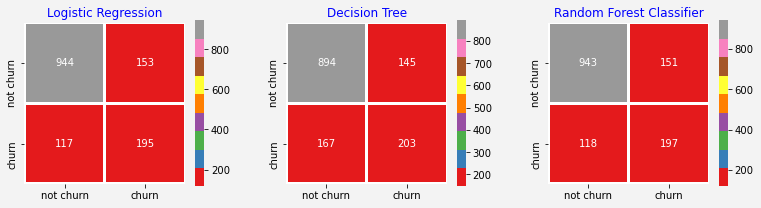

In [123]:

lst    = [log_model,decision_tree,rfc]

length = len(lst)

mods   = ['Logistic Regression','Decision Tree','Random Forest Classifier']
          

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(X_test_weighted)
    conf_matrix = confusion_matrix(predictions,y_test_weighted)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

### ROC curve for all models

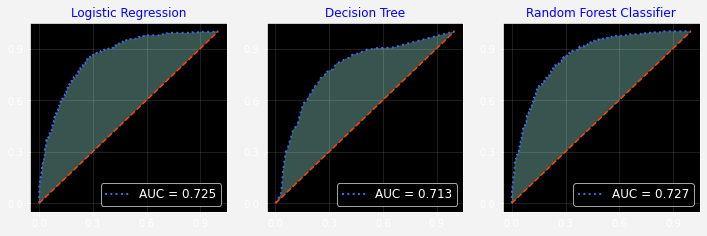

In [124]:

lst    = [log_model,decision_tree,rfc]

length = len(lst)

mods   = ['Logistic Regression','Decision Tree','Random Forest Classifier']

plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test_weighted)
    predictions   = i.predict(X_test_weighted)
    fpr,tpr,thresholds = roc_curve(y_test_weighted,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_test_weighted,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

### Precision Recall curves for all models

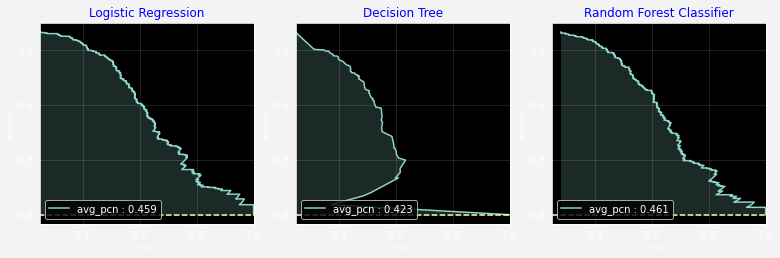

In [125]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


lst    = [log_model,decision_tree,rfc]

length = len(lst)

mods   = ['Logistic Regression','Decision Tree','Random Forest Classifier']

fig = plt.figure(figsize=(13,17))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test_weighted)
    predictions   = i.predict(X_test_weighted)
    recall,precision,thresholds = precision_recall_curve(y_test_weighted,probabilities[:,1])
    plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(y_test_weighted,predictions),3))))
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = .2)
    plt.legend(loc = "lower left",
               prop = {"size" : 10})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xlabel("recall",fontsize =7)
    plt.ylabel("precision",fontsize =7)
    plt.xlim([0.25,1])
    plt.yticks(np.arange(0,1,.3))


## Conclusion

- The model experimented three algorithms: Logitic Regression, Decision Tree, Random Forest.
- However, the best results were obtained by Random Forest after removing the features that were having less weightage. 
- This algorithm can be used for classification in this churn predictive model that gives an accuracy of 80 %.

# Thank you